# 추가 검증 : 서울시 범죄 현황과 발생 장소 관련성 검증

> 강남의 범죄 발생이 많은 것은 혹시 유흥업소의 밀집과 관련이 있지는 않을까?

- 확인을 위해 최초 받았던 발생 장소별 데이터를 읽어보자

In [1]:
import pandas as pd

crime_loc_raw = pd.read_csv(
	"../data/02. crime_in_Seoul_location.csv", thousands=",", encoding="euc-kr"
)
crime_loc_raw.head()

,범죄명,장소,발생건수
0,살인,"아파트, 연립 다세대",12
1,살인,단독주택,30
2,살인,노상,22
3,살인,상점,1
4,살인,"숙박업소, 목욕탕",4


In [2]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [3]:
crime_loc_raw["범죄명"].unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [4]:
crime_loc_raw["장소"].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

#### 🔰 DataFrame : "장소" X "범죄명"

In [5]:
import numpy as np

crime_loc = crime_loc_raw.pivot_table(
	crime_loc_raw, index=["장소"], columns=["범죄명"], aggfunc=np.sum
)
crime_loc

발생건수                      
범죄명         강간.추행  강도  살인     절도     폭력
장소                                     
교통수단          691   0   0    457    222
금융기관            2   1   1   1081     42
기타           2128  67  65  21734  26382
노상            986  87  22   9329  24535
단독주택          395  15  30   2241   3579
사무실           132   8   1    682   1229
상점             95  34   1   4403    852
숙박업소, 목욕탕     389   9   4    828    303
아파트, 연립 다세대   284  18  12   1504   2839
역, 대합실        181   0   0    356    272
유원지            59   2   2    367    424
유흥 접객업소       398  13   8   2035   2645
학교             33   0   0    400    203

In [6]:
crime_loc.columns = crime_loc.columns.droplevel([0])
crime_loc.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579


#### 🔰 정규화

In [7]:
crime_loc_norm = crime_loc / crime_loc.max()
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592
기타,1.000000,0.770115,1.000000,1.000000,1.000000
노상,0.463346,1.000000,0.338462,0.429235,0.929990
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661


#### 🔰 대표값 추가

In [8]:
crime_loc_norm["종합"] = np.mean(crime_loc_norm, axis=1) # row 연산
crime_loc_norm.head()

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669


#### 🔰 데이터 시각화

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc("font", family="Malgun Gothic")
%matplotlib inline

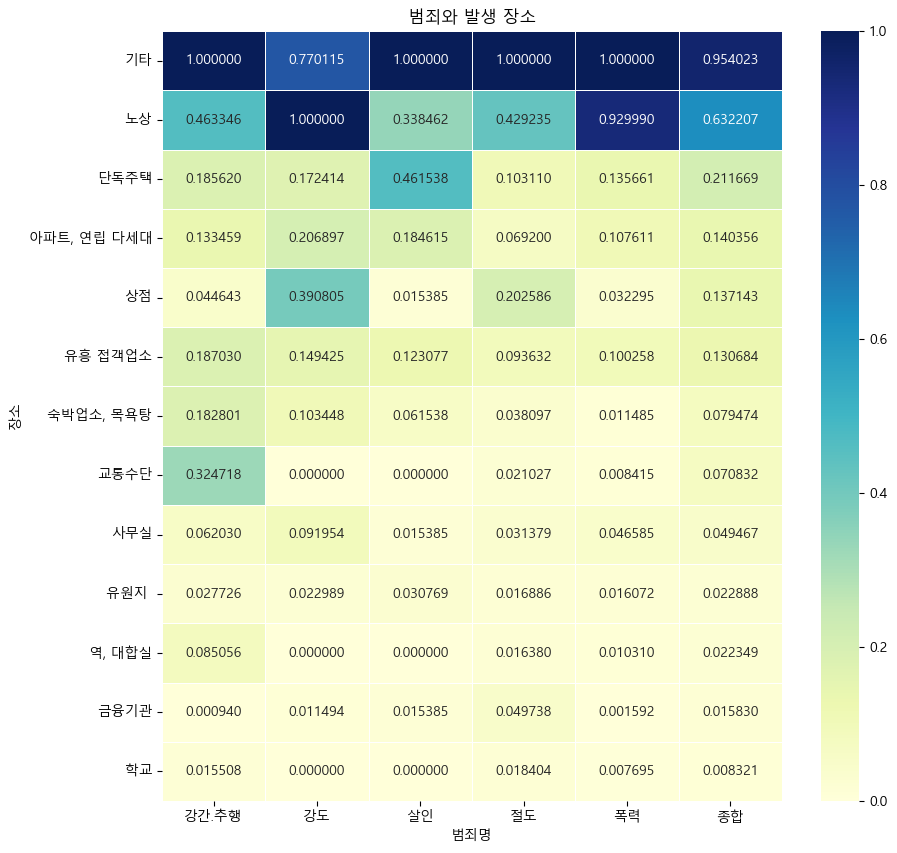

In [11]:

crime_loc_norm_sort = crime_loc_norm.sort_values(by="종합", ascending=False)

def drawGraph():
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        crime_loc_norm_sort,
        annot=True,
        fmt="f",
        linewidths=0.5,
        cmap="YlGnBu" #"RdPu"
    )
    plt.title("범죄와 발생 장소")
    plt.show()

drawGraph()